In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mep = pd.read_csv('retweets.csv')

In [ ]:
mep.shape

In [ ]:
mep.columns

Delete the records with not English languages

In [ ]:
mep.lang

In [ ]:
mep = mep.loc[mep.lang == 'en']

In [ ]:
import tweepy
auth = tweepy.OAuthHandler('hsaHW0P7kFtP7yiOTWV6E5Cmz', 'A1fgwDsjBQ48dYM8xHqq1fafs8sJpOAj9m9QFkEmqBjorpEk4X')

In [ ]:
mep

In [ ]:
origTweetList = mep.origTweetId.tolist()

In [ ]:
try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')

In [ ]:
# api = tweepy.API(auth)
# origText = []
# for tweetid in origTweetList:
#     try:
#         tweet = api.get_status(tweetid)
#         origText.append(tweet.text)
#         print(tweet.text)
#     except:
#         origText.append('')
#         print(' ')

https://stackoverflow.com/questions/44581647/retrieving-a-list-of-tweets-using-tweet-id-in-tweepy

In [ ]:
import tweepy

import time

t0 = time.time()

def lookup_tweets(tweet_IDs, api):
    full_tweets = []
    tweet_count = len(tweet_IDs)
    try:
        for i in range((tweet_count // 100) + 1):
            # Catch the last group if it is less than 100 tweets
            end_loc = min((i + 1) * 100, tweet_count)
            full_tweets.extend(
                api.statuses_lookup(id_=tweet_IDs[i * 100:end_loc])
            )  
        return full_tweets
    except tweepy.TweepError:
        print('Something went wrong, quitting...')

auth = tweepy.OAuthHandler('hsaHW0P7kFtP7yiOTWV6E5Cmz', 'A1fgwDsjBQ48dYM8xHqq1fafs8sJpOAj9m9QFkEmqBjorpEk4X')

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# do whatever it is to get por.TweetID - the list of all IDs to look up

results = lookup_tweets(origTweetList, api)

final_dic = {}

t1 = time.time()
total = t1-t0
print(total)

In [ ]:
for tweet in results:
    if tweet:
        final_dic[tweet.id] = tweet.text

In [ ]:
import pprint
# pprint.pprint(final_dic)
len(final_dic)

In [ ]:
tweet_text = pd.DataFrame.from_dict(final_dic, orient='index', columns=['tweetText'])

## Cross Validate that the number of rows is **10126**

### Something to investigate: Do we have duplicate tweets on the dataset?
### mep rows: 13796
### mep.origTweetId.unique(): 10834

In [ ]:
len(mep.origTweetId.unique())

In [ ]:
tweet_text

In [ ]:
mepExt = pd.merge(mep, tweet_text, left_on='origTweetId', right_index=True, how='inner')

In [ ]:
group = mepExt.groupby('origMepGroupShort').count()
groupFiltered = group.loc[group.origUserId > 50]
mepExt = mepExt.loc[mepExt.origMepGroupShort.isin(list(groupFiltered.index))]

In [ ]:
mepExt

In [ ]:
export = mepExt.to_csv(r'C:\Users\Ion\Documents\GitHub\Clustering-and-Classification-of-MEPs-Tweets\fullRetweets.csv',  index = None, header=True)

## Finish the clearing part -- Exporting the CSV so I don't need to run the proccess over and over again

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns", 30)
%matplotlib inline

fullRetweets = pd.read_csv('FullRetweets.csv')

In [ ]:
fullRetweets

## Remember to do something with word clouds
https://github.com/amueller/word_cloud

In [ ]:
import wordcloud
import matplotlib
import PIL

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

# another set of stopwords

from nltk.corpus import stopwords
import nltk
import sklearn as sk
nltk.download('stopwords')

In [ ]:
clean_text = fullRetweets.tweetText.drop_duplicates()

In [ ]:
corpus = list(clean_text)

In [ ]:
from sklearn.feature_extraction import text 

my_additional_stop_words = ['http', 'https', 'amp', 'timmermans', 'timkirkhopemep', 'etuc_ces', 'kurdish', 'europe', 'eu', 'ep', 'european', 'parliament']

stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [ ]:
my_stop_words = set(stopwords.words('english')) 
vectorizer = CountVectorizer(lowercase=True, min_df=10, max_df=0.6, stop_words = stop_words)
X = vectorizer.fit_transform(corpus)
X.shape
# vectorizer2 = TfidfVectorizer(lowercase=True, min_df=10, max_df=0.5, stop_words='english')
# X2 = vectorizer2.fit_transform(corpus)

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)

In [ ]:
cluster_labels = kmeans.fit_predict(X)

In [ ]:
metrics.silhouette_score(X, labels=cluster_labels)

In [ ]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :15]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

In [ ]:
Y = vectorizer.transform(["brexit is coming"])
prediction = kmeans.predict(Y)
print(prediction)

In [ ]:
from yellowbrick.cluster import InterclusterDistance
model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,9))

visualizer.fit(X)
visualizer.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(4 * 4,  2 * 8))

scores = {}
for n_clusters in range(2, 10):
    plt.subplot(4, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

In [ ]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

## Classification

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
import sklearn as sk

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns", 30)
%matplotlib inline

fullRetweets = pd.read_csv('FullRetweets.csv')

In [273]:
fullRetweets

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,retweetMepId,retweetMepName,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang,tweetText
0,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,124945,Margot PARKER,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en,Euro Parliament votes overwhelmingly to reject...
1,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,124965,Nathan GILL,6,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en,"US have one currency, one Central Bank and one..."
2,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,96672,Marita ULVSKOG,1,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en,More jobs for young people is my top priority ...
3,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,124945,Margot PARKER,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en,"Vote #Labour, get Tory. Vote Tory, get Labour...."
4,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Sun Mar 29 18:53:32 +0000 2015,582254277122473984,en,"Vote #Labour, get Tory. Vote Tory, get Labour...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12903,1485429175,JSaryuszWolski,28297,Jacek SARYUSZ-WOLSKI,4,EPP,20,POL,539156512,ZdzKrasnodebski,124891,Zdzisław KRASNODĘBSKI,5,ECR,20,POL,Sun Jan 24 13:17:25 +0000 2016,691248438504210432,Mon Jan 25 08:21:14 +0000 2016,691536290198745088,en,Drastic drop in positive EU perception in Pola...
12904,829060856,TheresaMEP,124961,Theresa GRIFFIN,1,S&D,27,GBR,1354570123,julie4nw,124963,Julie WARD,1,S&D,27,GBR,Sun Jan 24 14:04:13 +0000 2016,691260217288454144,Sun Jan 24 14:54:31 +0000 2016,691272874393485314,en,I'm with @UKYP North West now in Knowsley - gr...
12905,829060856,TheresaMEP,124961,Theresa GRIFFIN,1,S&D,27,GBR,202610289,akhanmep,124962,Afzal KHAN,1,S&D,27,GBR,Sun Jan 24 14:12:29 +0000 2016,691262296396599296,Sun Jan 24 14:21:13 +0000 2016,691264493725335552,en,Listening to some fab ideas from young people ...
12906,829060856,TheresaMEP,124961,Theresa GRIFFIN,1,S&D,27,GBR,1354570123,julie4nw,124963,Julie WARD,1,S&D,27,GBR,Sun Jan 24 14:12:29 +0000 2016,691262296396599296,Sun Jan 24 14:54:26 +0000 2016,691272856739659776,en,Listening to some fab ideas from young people ...


In [274]:
classif_tweets = fullRetweets[['tweetText', 'origMepGroupShort']]

In [275]:
classif_tweets = classif_tweets.drop_duplicates()

In [276]:
classif_tweets

,tweetText,origMepGroupShort
0,Euro Parliament votes overwhelmingly to reject...,EFDD
1,"US have one currency, one Central Bank and one...",S&D
2,More jobs for young people is my top priority ...,S&D
3,"Vote #Labour, get Tory. Vote Tory, get Labour....",EFDD
5,Answering my question in ECR Group J-C Juncker...,ECR
...,...,...
12901,Time to lock EU leaders in a room to sort #ref...,ALDE
12903,Drastic drop in positive EU perception in Pola...,EPP
12904,I'm with @UKYP North West now in Knowsley - gr...,S&D
12905,Listening to some fab ideas from young people ...,S&D


Let's first investigate the balance of different tweets between the different political parties.

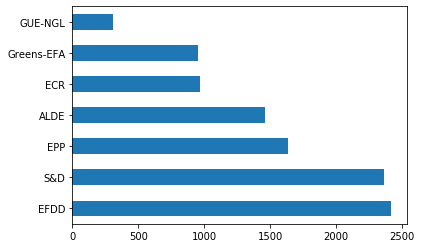

In [277]:
classif_tweets.origMepGroupShort.value_counts().plot(kind='barh')
plt.show()

* We notice that the data are quite unbalanced, might have to think what we should do about that
* Let's create a ```dummy classifier``` who's score will be our threshold

In [278]:
X = classif_tweets.tweetText
y = classif_tweets.origMepGroupShort
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)

array(['EFDD', 'EFDD', 'EFDD', ..., 'EFDD', 'EFDD', 'EFDD'], dtype='<U4')

In [279]:
dummy_clf.score(X, y)

0.23935854286279945

Number of words to be inserted to the model

In [303]:
classif_tweets.tweetText.apply(lambda x: len(x.split(' '))).sum()

122235

## Further cleaning

In [280]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ion\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* We have to create a **bag of words** is which we will do the classification
* We must to some further cleaning to the text to get better results

In [281]:
### Remove Stepwords

STOPWORDS = set(stopwords.words('english'))
my_additional_stop_words = ['http', 'https', 'amp', 'timmermans',
                            'timkirkhopemep', 'etuc_ces', 'europe', 'eu', 'ep',
                            'european', 'parliament', 'today', 'tonight', 'tomorrow', 'morning',
                           'see', 'want']
STOPWORDS.update(my_additional_stop_words)
def stopwords(text):
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

classif_tweets.tweetText = classif_tweets.tweetText.apply(lambda x: stopwords(x))

In [282]:
import string
import re

In [283]:
### Remove Punctuation

def remove_punctuation(text):
    no_punc = "".join([c for c in text if c not in string.punctuation])
    return no_punc

classif_tweets['tweetText'] = classif_tweets['tweetText'].apply(lambda x: remove_punctuation(x)) 

In [284]:
### Remove URLS

def remove_urls(text):
    no_url = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    return no_url
classif_tweets['tweetText'] = classif_tweets['tweetText'].apply(lambda x: remove_urls(x)) 

We will try both Lemmatizer and Stemming to compare the results on the models and conclude

In [285]:
tokenizer = RegexpTokenizer(r'\w+')
classif_tweets.tweetText = classif_tweets.tweetText.apply(lambda x: tokenizer.tokenize(x.lower()))

In [267]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

classif_tweets.tweetText = classif_tweets.tweetText.apply(lambda x: word_lemmatizer(x))

On Naive Bayes we got 0.52 accurancy

Let's also try Stemming (which is more aggressive)

In [301]:
# Deactivated Stemmer since it gives us worse results

# stemmer = PorterStemmer()

# def word_stemmer(text):
#     stem_text = " ".join([stemmer.stem(i) for i in text])
#     return stem_text

# classif_tweets.tweetText = classif_tweets.tweetText.apply(lambda x: word_stemmer(x))

Stemming got us a lower accurancy on Naive Bayes model, so we are going to use **lemmatizer**

In [302]:
classif_tweets.tweetText

0        euro parliament vote overwhelmingli reject act...
1        us one currenc one central bank one govt europ...
2        more job young peopl top prioriti eu socialdem...
3        vote labour get tori vote tori get labour vote...
5        answer question ecr group jc juncker confirm p...
                               ...                        
12901    time lock eu leader room sort refugeecrisi thi...
12903    drastic drop posit eu percept poland effect po...
12904    im ukyp north west knowsley great meet myp acr...
12905    listen fab idea young peopl across nw tackl ra...
12907    first big bank big pharma in whose interest eu...
Name: tweetText, Length: 10102, dtype: object

Now that we cleaned the data, let's create a WordCloud, just for fun!

In [293]:
%matplotlib inline

from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', stopwords=STOPWORDS,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

In [294]:
def plot_word_cloud_for_category(df, category):
    text_df = df.loc[df.origMepGroupShort == str(category)]

    texts = ''    
    for index, item in text_df.iterrows():
        texts = texts + ' ' + item['tweetText']
    plot_word_cloud(texts)

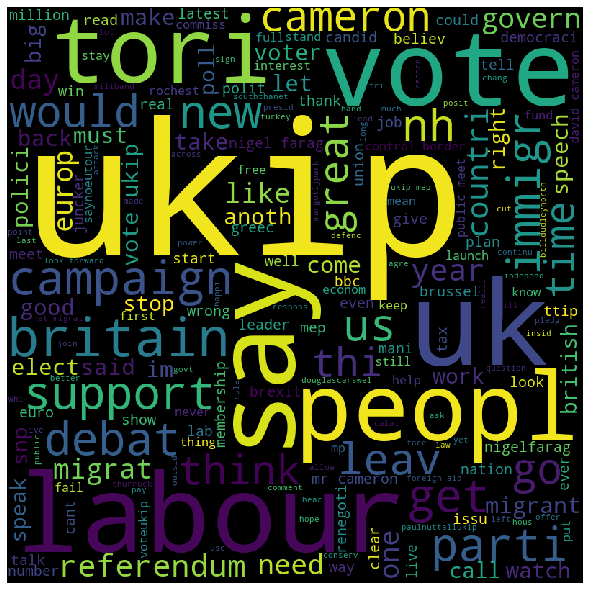

In [295]:
plot_word_cloud_for_category(classif_tweets,'EFDD')

In [288]:
my_tags = list(classif_tweets.origMepGroupShort.unique())

It's time to split the data to training and testing. We are going give 70% for training and 30% for testing

In [304]:
X = classif_tweets.tweetText
y = classif_tweets.origMepGroupShort

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## Naive Bayes

In [313]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline(steps=[('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

scores = cross_val_score(nb, X, y, cv=5)
print('Accuracy for Naive Bayes Classifier %s' % accuracy_score(y_pred, y_test))
print('Accuracy for Naive Bayes Classifier with CV: ', scores.mean())
print(classification_report(y_test, y_pred,target_names=my_tags))

Accuracy for Naive Bayes Classifier 0.5222698779280766
Accuracy for Naive Bayes Classifier with CV:  0.5075205446247135
              precision    recall  f1-score   support

        EFDD       0.71      0.20      0.31       435
         S&D       0.93      0.05      0.09       287
         ECR       0.55      0.92      0.69       754
        ALDE       0.74      0.50      0.60       500
         EPP       0.00      0.00      0.00        88
  Greens-EFA       1.00      0.04      0.08       297
     GUE-NGL       0.41      0.79      0.54       670

    accuracy                           0.52      3031
   macro avg       0.62      0.36      0.33      3031
weighted avg       0.64      0.52      0.45      3031



C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We only have achieved 50% accurancy. Let's try another method

## Stohastic Gradient Descend

In [315]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline(steps=[('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

scores = cross_val_score(sgd, X, y, cv=5)
print('Accuracy for SGD Classifier %s' % accuracy_score(y_pred, y_test))
print('Accuracy for SGD Classifier with CV: ', scores.mean())

print(classification_report(y_test, y_pred,target_names=my_tags))

Accuracy for SGD Classifier 0.6027713625866051
Accuracy for SGD Classifier with CV:  0.5810681011340397
              precision    recall  f1-score   support

        EFDD       0.59      0.44      0.51       435
         S&D       0.57      0.26      0.35       287
         ECR       0.59      0.89      0.71       754
        ALDE       0.66      0.64      0.65       500
         EPP       0.75      0.45      0.57        88
  Greens-EFA       0.64      0.30      0.41       297
     GUE-NGL       0.58      0.66      0.62       670

    accuracy                           0.60      3031
   macro avg       0.63      0.52      0.54      3031
weighted avg       0.61      0.60      0.58      3031



It seems we did better, achieving 60%, which is 10% better than the Naive Bayes

## Multi Class Logistic Regression 

In [316]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline(steps=[('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

scores = cross_val_score(logreg, X, y, cv=5)
print('Accuracy for Logistic Regression Classifier %s' % accuracy_score(y_pred, y_test))
print('Accuracy for Logistic Regression Classifier with CV: ', scores.mean())
print(classification_report(y_test, y_pred, target_names=my_tags))

C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

Accuracy for Logistic Regression Classifier 0.60442098317387
Accuracy for Logistic Regression Classifier with CV:  0.5606632548458069
              precision    recall  f1-score   support

        EFDD       0.51      0.51      0.51       435
         S&D       0.45      0.37      0.41       287
         ECR       0.71      0.80      0.75       754
        ALDE       0.64      0.61      0.63       500
         EPP       0.65      0.45      0.53        88
  Greens-EFA       0.48      0.37      0.42       297
     GUE-NGL       0.60      0.66      0.63       670

    accuracy                           0.60      3031
   macro avg       0.58      0.54      0.55      3031
weighted avg       0.60      0.60      0.60      3031



## Random Forest Classifier

In [320]:
from sklearn.ensemble import RandomForestClassifier

rfClf = Pipeline(steps=[('vect', CountVectorizer()),
                                ('tfidf', TfidfTransformer()),
                                ('random_forest', RandomForestClassifier())])
scores = cross_val_score(rfClf, X, y, cv=5, scoring='accuracy')

y_pred = logreg.predict(X_test)

print('CV Accuracy for RandomForest : ', scores.mean())
print(classification_report(y_test, y_pred, target_names=my_tags))

C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

Accuracy for RandomForest :  0.4986077685598115
              precision    recall  f1-score   support

        EFDD       0.51      0.51      0.51       435
         S&D       0.45      0.37      0.41       287
         ECR       0.71      0.80      0.75       754
        ALDE       0.64      0.61      0.63       500
         EPP       0.65      0.45      0.53        88
  Greens-EFA       0.48      0.37      0.42       297
     GUE-NGL       0.60      0.66      0.63       670

    accuracy                           0.60      3031
   macro avg       0.58      0.54      0.55      3031
weighted avg       0.60      0.60      0.60      3031



## XGBoost Classifier

In [323]:
import xgboost as xgb

xgb = Pipeline(steps=[('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])
scores = cross_val_score(xgb, X, y, cv=5)
print('Accuracy for XGBoost Classifier : ', scores.mean())

Accuracy for XGBoost Classifier :  0.48800585653106265


In [325]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator
class Text2TfIdfTransformer(BaseEstimator):

    def __init__(self):
        self._model = TfidfVectorizer()
        pass

    def fit(self, df_x, df_y=None):
        df_x = df_x.apply(lambda x : clean_text(x))
        self._model.fit(df_x)
        return self

    def transform(self, df_x):
        return self._model.transform(df_x)

In [326]:
pl_random_forest_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                                   ('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest_tf_idf, X, y, cv=5,scoring='accuracy')
print('Accuracy for Tf-Idf & RandomForest : ', scores.mean())

C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

Accuracy for Tf-Idf & RandomForest :  0.5036530335801515


In [333]:
import xgboost as xgb
pl_xgb_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                                ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])

scores = cross_val_score(pl_xgb_tf_idf, X, y, cv=5)
print('Accuracy for Tf-Idf & XGBoost Classifier : ', scores.mean())

Accuracy for Tf-Idf & XGBoost Classifier :  0.4893889051930868


In [335]:
from sklearn.ensemble import AdaBoostClassifier
ada = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                                ('ada', AdaBoostClassifier(n_estimators=100, random_state=0))])

scores = cross_val_score(ada, X, y, cv=5)
print('Accuracy for Tf-Idf & Ada Classifier : ', scores.mean())

Accuracy for Tf-Idf & XGBoost Classifier :  0.4079083326138363


pretty bad...

In [346]:
from sklearn.model_selection import GridSearchCV
import pprint
from time import time
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet')
    # 'clf__max_iter': (10, 50, 80)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])

t0 = time()
grid_search.fit(X, y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\Ion\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    7.4s finished


done in 8.152s

Best score: 0.574
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'l2'
	vect__max_df: 0.75
	vect__ngram_range: (1, 2)
